In [ ]:
#hide
from your_lib.core import *

# Project name here

> Summary description here.

This file will become your README and also the index of your documentation.

## Install

`pip install your_project_name`

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
import pandas as pd
from babino2020masks.core import *
from babino2020masks.lasso import *
from covid19bsas.core import *

In [ ]:
df = get_bsas_data()

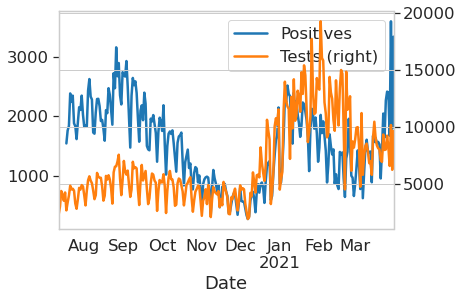

In [ ]:
df.plot(x='Date', y=['Positives', 'Tests'], secondary_y=['Tests']);

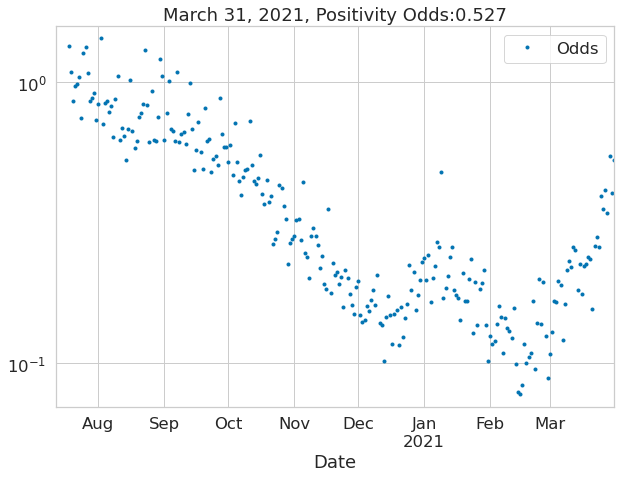

In [ ]:
ax = plot_data_and_fit(df, 'Date', 'Odds', None, None, None, figsize=(10, 7))
ax.set_title(f'{df.tail(1).Date[0]:%B %d, %Y}, Positivity Odds:{df.tail(1).Odds.values[0]:2.3}');